In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab06.ipynb")

# Lab 06: Helicopter Drop

Welcome to Lab 06! After such an extensive introduction to programming for data science, we are finally moving into the section of the course where we can apply our new skills to answer real questions.  

In this lab, we'll use testing techniques that were introduced in lecture to test the idea of the therapeutic touch, the idea that some practitioner can feel and massage your human energy field.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Also, throughout this lab please be sure to not re-assign variables throughout the notebook. For example, if you use `expected_proportion_correct` in your answer to one question, do not reassign it later on. Moreover, be mindful that functions that you write in earlier cells will need to be referenced to answer questions in later questions.

**Due Date:** 

**Collaboration Policy:** Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others **please include their names below** (it's a good way to learn your classmates' names).

**Collaborators:** 

List collaborators here. 

First, set up the notebook by running the cell below.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 1. A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step.

**Question 1.** The following statements are the unordered steps of an A/B hypothesis test:

1. Choose a test statistic (typically the difference in means between two categories)

2. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times

3. Find the value of the observed test statistic

4. Calculate the p-value based off your observed and simulated test statistics

5. Define a null and alternate model

6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Make an array called `ab_test_order` that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test.

In [2]:
ab_test_order = make_array(5, 1, 3, 2, 4, 6) # SOLUTION

In [ ]:
grader.check("q1")

<!-- BEGIN QUESTION -->

**Question 2.** If the null hypothesis of an A/B test is correct, should the order of labels affect the differences in means between each group?

_Type your answer here, replacing this text._

**SOLUTION:** Under the null model, there should be no statistically significant difference between the grouped means.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** Why do we shuffle labels in an A/B test? 

_Type your answer here, replacing this text._

**SOLUTION:** We shuffle labels as a way to resample the original data, and understand the baseline differences between groups in the data.

<!-- END QUESTION -->

# 2. Paper Helicopters

The [Paper Helicopter Experiment](https://www.paperhelicopterexperiment.com/) provides different templates for constructing paper helicopters that can be dropped. The designs can be modified to create helicopters with different dimensions for the wings, body, weighting, and more. In this lab you'll investigate whether the length of the rotor and the amount of weight attached to helicopter results in a different in the time it takes to fall from a 3rd floor stairwell. Do conduct your analysis, you'll use an A/B test.

## The Data
The data was collected by a group of NCSSM Online students during online weekend held October 2nd, 2021. Five groups of students dropped 143 paper helicopters in total. There were 4 unique configurations that were assigned to the groups, one per group.

1. The Default: Full length (long) rotors, unweighted body
2. The Short: Short rotors, unweighted body
3. The Heavy: Long rotors, weighted body
4. The Short Heavy: Short rotors, weighted body

The following features were recorded for each helicopter dropped:
* `Rotor`: Long or Short (string). Indicates if the helicopter had full length or shortened rotors.
* `Weight`: Weighted or Unweighted (string). Indicates if the helicopter had a weighted (3 paperclips) or unweighted body.
* `Team`: 1, 2, 3, 4, or 5 (int). Indicates which team
* `Location`: Side A or Side B (string). Indicates which side of the building the helicopters were dropped from.
* `Obstruction`: True or False (Boolean). Indicates if the helicopter hit the stairwell or other object on the way down.
* `Time`: (Float). Time, measured in seconds, it took for the helicopter to hit the ground after being released.

Run the following cell to load the data in as the table named `copters`.

In [6]:
copters = Table.read_table('data/helicopters.csv')
copters

Rotor,Weight,Team,Location,Obstruction,Time
Long,Unweighted,1,Side A,False,4.93
Long,Unweighted,1,Side A,False,4.07
Long,Unweighted,1,Side A,True,1.17
Long,Unweighted,1,Side A,True,4.91
Long,Unweighted,1,Side A,True,4.4
Long,Unweighted,1,Side A,False,5.41
Long,Unweighted,1,Side A,False,4.99
Long,Unweighted,1,Side A,False,5.8
Long,Unweighted,1,Side A,False,5.94
Long,Unweighted,1,Side A,False,5.14


Due to variation in the construction, weather, and randomness of the universe not every drop for each configuration was identical. Let's explore the data a bit to see how the drop times varied.

**Question 4.** Let's start by cleaning the data a little. This dataset has several measurements taken where the helicopter hit the stairwell, a nearby building, or some other obstruction that impacted the fall time. These results should be discarded since they wouldn't be an accurate reflection of what we're trying to measure.

Create a new table called `helicopters` that only contains the rows of `copters` that correspond to a helicopter that did not hit an obstruction during the fall.

In [7]:
helicopters = copters.where('Obstruction', False) # SOLUTION
helicopters

Rotor,Weight,Team,Location,Obstruction,Time
Long,Unweighted,1,Side A,False,4.93
Long,Unweighted,1,Side A,False,4.07
Long,Unweighted,1,Side A,False,5.41
Long,Unweighted,1,Side A,False,4.99
Long,Unweighted,1,Side A,False,5.8
Long,Unweighted,1,Side A,False,5.94
Long,Unweighted,1,Side A,False,5.14
Long,Unweighted,1,Side A,False,5.53
Long,Unweighted,1,Side A,False,6.3
Short,Weighted,2,Side A,False,3.41


In [ ]:
grader.check("q4")

**Question 5.** Suppose you're interested in determining how the rotor length might impact fall time. Start by creating a histogram that displays the distribution of times for helicopters with long rotors. Use the provided bins stored to `my_bins`.

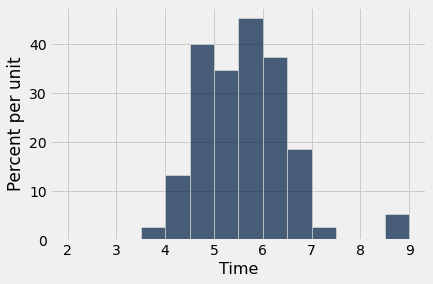

In [10]:
my_bins = np.arange(2, 9.5, 0.5)
helicopters.where('Rotor', 'Long').hist('Time', bins=my_bins ) # SOLUTION

<!-- BEGIN QUESTION -->

**Question 6.** Now, construct a histogram that shows the distribution of times for only helicopters with short rotors. Again, use the provided bins.

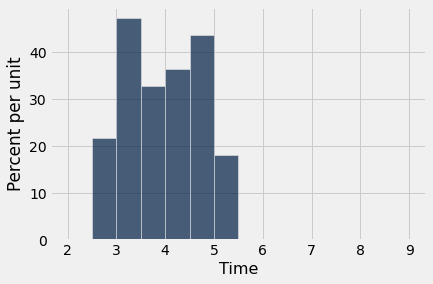

In [11]:
my_bins = np.arange(2, 9.5, 0.5)
helicopters.where('Rotor', 'Short').hist('Time', bins=my_bins ) # SOLUTION

<!-- END QUESTION -->

### Bonus Feature (Ungraded)

It can be difficult sometimes to compare two histograms when they are on separate graphs. However, by providing the argument `group` to the `.hist()` method with the label (string) for a column you wish to group by, and it will produce a histogram for each unique group.

For example, `table.hist('col_label', bins=your_bins, group='feature')` would produce a histogram for each unique group found in the `feature` column of `table`, using the numerical data in the column labeled `col` label.

Running the cell below will create 2 histograms, one for each group as determined by the values in the `Rotor` column.

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


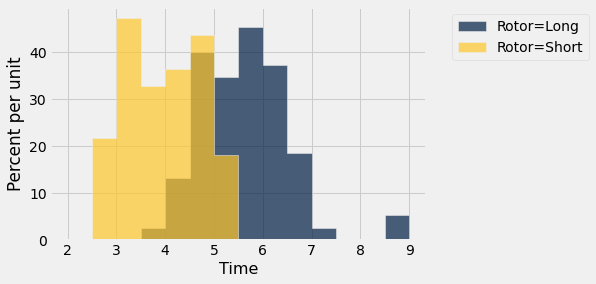

In [14]:
my_bins = np.arange(2, 9.5, 0.5)
helicopters.hist('Time', bins=my_bins, group="Rotor" )

You can see it's much easier to compare these two distributions now that they're on the same scale and set of axes.

## 3. The Rotor Question

You might now be wondering if there is a difference between the fall times of helicopters with long (full length) vs. short rotors. It certainly appears that the distributions might be different than each other. We'll use our data to attempt to draw a conclusion.

<!-- BEGIN QUESTION -->

**Question 7.** We want to know whether the shortening the rotor length **causes** a change in the fall time.  

Why is it not sufficient to compare fall times of the helicopters with short rotors and those with long rotors?

_Type your answer here, replacing this text._

**SOLUTION:** We didn't run a randomized controlled experiment, so we may be misled by confounding factors or reverse causation.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 8.** Why is an A/B test appropriate for this situation? What would you use as the "A" group (the control group) and which group is the "B" group (the treatment group)?

_Type your answer here, replacing this text._

**SOLUTION:** An A/B test is appropriate because we are comparing 2 distributions of numerical data. The "A" group is full length rotors. The "B" group is the short rotors. 

<!-- END QUESTION -->

**Question 9.** Create a table `time_means` that contains the average fall time for the full length rotor helicopters and the shortened rotor helicopters. It should have two columns: one indicating the rotor length, and one that contains the average fall time for each group.

**Hint:** Use a combination of `.select()` and `.group()` to make short work of this.

In [15]:
time_means = helicopters.select("Rotor", "Time").group('Rotor', np.average) # SOLUTION
time_means

Rotor,Time average
Long,5.61067
Short,3.96364


In [ ]:
grader.check("q9")

<!-- BEGIN QUESTION -->

**Question 10.** We want to figure out if there is a difference between the distribution of fall times for full length and shortened rotor helicopters. Specifically, we want to test if fall times were longer for longer rotor helicopters than they were for shorter rotor helicopters. 

What should the test statistic be? How does it help us differentiate whether the data supports the null and alternative? 

Confirm your answer with your instructor (or a classmate who already has) before moving on.

_Type your answer here, replacing this text._

**SOLUTION:** We want to find the difference between the mean fall times. Low values of this difference support the null. High values of this difference support the alternative.

<!-- END QUESTION -->

**Question 11.** Calculate the test statistic for our observed data using the `time_means` table. Set `observed_difference` to the value you compute. 

In [19]:
# BEGIN SOLUTION NO PROMPT
means = time_means.column(1)
# END SOLUTION
observed_difference = means.item(0)-means.item(1) # SOLUTION
observed_difference

1.647030303030303

In [ ]:
grader.check("q11")

**Question 12.** To perform an A/B test, we'll need to compute similar statistics for our many simulations we'll run. Writing a function which returns the statistic will be a great way to save time. Write a function named `find_test_stat` which takes in the arguments `table`, `labels_col`, and `values_col` that calculates the test statistic for this problem. The `table` passed into this function will be a permutation of our original table and structured the same way. `labels_col` will be passed a string that specifies which column in the table contains the label you'll be grouping by. `values_col` specifies which column contains the values that you'll be using to compute the test statistic.

When you've written this function, you can pass it any table and the two specified labels and it will compute a test statistic for an A/B test, not just for this problem, but any problem! A very handy function to keep around. 

Running `find_test_stat(helicopters, "Rotor", "Time")` should return the exact same value your code from the previous question computed: the difference between of average values in the "Time column between the groups determined by "Rotor" column in the `helicopters` table. However, you should also be able to run `find_test_stat(helicopters, "Weight", "Time")` to computer the difference between of average values in the **"Weight"** column between the groups determined by "Rotor" column in the `helicopters` table just as easily. 

In [22]:
def find_test_stat(table, labels_col, values_col):
    """Find test statistic between two categories given
       the label column and the value column.
    """
    # BEGIN SOLUTION
    reduced = table.select(labels_col, values_col)
    means_table = reduced.group(labels_col, np.average)
    means = means_table.column(1)
    return means.item(0) - means.item(1)
# END SOLUTION
find_test_stat(helicopters, "Rotor", "Time")

1.647030303030303

In [ ]:
grader.check("q12")

When we run a simulation for A/B testing, we resample the data by shuffling the labels of the original sample. If the null hypothesis is true and the time distributions **are** the same, we expect that the difference in mean time will be not change when "Rotor" labels are changed.

**Question 13.** Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.

**Hint:** You can "shuffle" the labels by using `.sample(with_replacement = False)` on the table, and then just selected the column (as an array using `.column`) that contains the newly shuffled labels. Then, you can either overwrite the existing labels, or, extend the table with a new column labeled something like "shuffled labels". Just make sure you pass the correct label on to `find_test_stat`!

Note: The autograder test here is fairly lenient, if you have an issue with the following questions, make sure to take a look at your answer to the previous question. Specifically, make sure that you are taking the directionality of our alternative hypothesis into account, meaning, check the order in which you are subtracting the average times.

In [25]:
def simulate_and_test_statistic(table, labels_col, values_col):
    """Function used to compute one trial of the A/B test.
    """
    # BEGIN SOLUTION
    shuffled_labels = table.sample(with_replacement = False).column(labels_col)
    original_and_shuffled = table.with_column("shuffled labels", shuffled_labels)
    return find_test_stat(original_and_shuffled, "shuffled labels", values_col)
    # END SOLUTION
    
simulate_and_test_statistic(helicopters, "Rotor", "Time")

-0.13861818181818286

In [ ]:
grader.check("q13")

**Question 14.** Now that we can quickly shuffle the labels and compute a test statistic, simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`

In [27]:
# This cell might take a couple seconds to run
differences = make_array()
# BEGIN SOLUTION
repetitions = 5000
for i in np.arange(repetitions):
    new_difference = simulate_and_test_statistic(helicopters, "Rotor", "Time")
    differences = np.append(differences, new_difference)
# END SOLUTION
differences

array([-0.02989091, -0.028     , -0.14397576, ..., -0.11151515,
        0.18220606,  0.21844848])

In [ ]:
grader.check("q14")

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic.

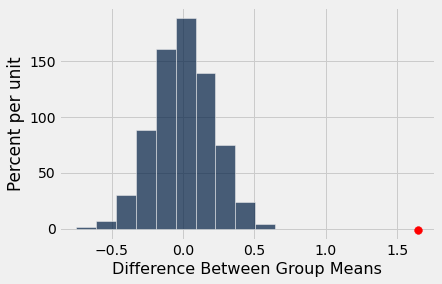

In [29]:
Table().with_column('Difference Between Group Means', differences).hist()
plt.scatter(observed_difference, -0.01, color='red', s=60, zorder=2);

**Question 15.** Find the p-value for your test and assign it to `empirical_P`

In [30]:
empirical_P = np.count_nonzero(differences >= observed_difference)/repetitions # SOLUTION
empirical_P

0.0

In [ ]:
grader.check("q15")

<!-- BEGIN QUESTION -->

**Question 16.** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about fall times of helicopters with full length vs shortened rotors? What can you claim about causation from your statistical analysis?

_Type your answer here, replacing this text._

**SOLUTION:** Our p-value of 0 is less than than the cutoff of 0.05. Our data supports the alternative hypothesis and we can conclude that rotor length causes a difference in drop time for these paper helicopters.

<!-- END QUESTION -->

## 4. Bonus Investigation (Optional, Not graded)

Suppose you're curious if the stairwell that similar helicopters were dropped from would cause a difference in drop times. Let's focus on one type of helicopter, the full size rotor and unweighted body, which was dropped from both stairwells. Run the code below to create a table called `stairwell` which will pare down the original data set to just this type of helicopter.

In [31]:
stairwell = helicopters.where('Rotor', 'Long').where('Weight', 'Unweighted')
stairwell

Rotor,Weight,Team,Location,Obstruction,Time
Long,Unweighted,1,Side A,False,4.93
Long,Unweighted,1,Side A,False,4.07
Long,Unweighted,1,Side A,False,5.41
Long,Unweighted,1,Side A,False,4.99
Long,Unweighted,1,Side A,False,5.8
Long,Unweighted,1,Side A,False,5.94
Long,Unweighted,1,Side A,False,5.14
Long,Unweighted,1,Side A,False,5.53
Long,Unweighted,1,Side A,False,6.3
Long,Unweighted,4,Side B,False,5.65


Complete a similar analysis to:

* compute the observed value of the test statistic
* simulate 5000 A/B tests to create a distribution of the test statistic
* compute the empirical p-value
* determine if the stairwell caused a difference in the drop times


# 5. Submitting your work
You're done with Lab 06! All assignments in the course will be distributed as notebooks like this one, and you will submit your work by doing the following:

* Save your notebook

* Restart the kernel and run up to this cell.

* Run all the tests by running the cell containing `grader.check_all()`. Make sure they pass the way you expect them to.

* Run the cell below with the code `grader.export("lab06.ipynb")`.

* Download the file named `lab06.zip`, found in the explorer pane on the left side of the screen.

* Upload `lab06.zip` to the Lab 06 assignment on Canvas.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

When done exporting, download the .zip file by finding it in the file browswer on the left side of the screen, then right-click and select **Download**. You'll submit this .zip file for the assignment in Canvas to Gradescope for grading.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()